# Chi Square Test

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as plot
%matplotlib inline
#import seaborn as sns
weed_pd = pd.read_csv("Weed.csv",parse_dates=[-1])

In [21]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01


In [22]:
weed_pd["month"] = weed_pd.date.apply(lambda x: x.month)
weed_pd["year"] = weed_pd.date.apply(lambda x: x.year)

In [23]:
weed_pd.head()

,State,HighQ,HighQN,MedQ,MedQN,LowQ,LowQN,date,month,year
0,Alabama,339.06,1042,198.64,933,149.49,123,2014-01-01,1,2014
1,Alaska,288.75,252,260.60,297,388.58,26,2014-01-01,1,2014
2,Arizona,303.31,1941,209.35,1625,189.45,222,2014-01-01,1,2014
3,Arkansas,361.85,576,185.62,544,125.87,112,2014-01-01,1,2014
4,California,248.78,12096,193.56,12812,192.92,778,2014-01-01,1,2014


In [24]:
weed_jan2014 = weed_pd[(weed_pd.year==2014) & (weed_pd.month==1)][["HighQN", "MedQN", "LowQN"]]
weed_jan2015 = weed_pd[(weed_pd.year==2015) & (weed_pd.month==1)][["HighQN", "MedQN", "LowQN"]]

In [25]:
weed_jan2014.head(3)

,HighQN,MedQN,LowQN
0,1042,933,123
1,252,297,26
2,1941,1625,222


In [26]:
weed_jan2014.sum(axis = 0, skipna = True)

HighQN    2918004
MedQN     2644757
LowQN      263958
dtype: int64

In [27]:
weed_jan2015.sum(axis = 0, skipna = True)

HighQN    4057716
MedQN     4035049
LowQN      358088
dtype: int64

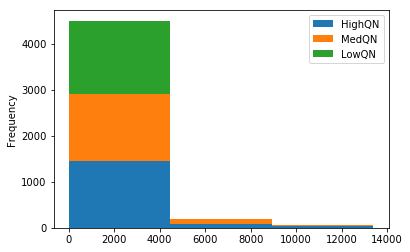

In [28]:
weed_jan2014.plot.hist(stacked=True, bins=3)

In [29]:
Expected = np.array(weed_jan2014.apply(sum, axis=0))
Observed = np.array(weed_jan2015.apply(sum, axis=0))

In [31]:
print ("Expected:", Expected, "\n" , "Observed:", Observed)

Expected: [2918004 2644757  263958] 
 Observed: [4057716 4035049  358088]


In [30]:
stats.chisquare(Observed, Expected)

Power_divergenceResult(statistic=1209562.2775169075, pvalue=0.0)

# ANNOVA TEST

In [32]:
#import researchpy as rp
#import seaborn as sns
import statsmodels.api as sm
#from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import pandas as pd
import scipy.stats as stats
#import researchpy as rp    
#import matplotlib.pyplot as plt
fert_data = pd.read_excel("Ferti.xlsx")

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
fert_data.head(3)

,Fert,Water,Yield
0,A,High,27.4
1,A,High,33.6
2,A,High,29.8


In [34]:
fert_data["Yield"].describe()

count    30.00000
mean     28.59800
std       4.83169
min      19.40000
25%      25.55000
50%      29.60000
75%      32.92500
max      35.20000
Name: Yield, dtype: float64

In [35]:
stats.f_oneway(fert_data['Yield'][fert_data['Fert'] == 'A'], 
             fert_data['Yield'][fert_data['Fert'] == 'B'],
             fert_data['Yield'][fert_data['Fert'] == 'C'])

F_onewayResult(statistic=1.8324797259724102, pvalue=0.17936532422018081)